In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
df.shape

(11162, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [19]:
# Replacing Education "unknown" values with NaN (standard missing value representation)
df["education"] = df["education"].replace("unknown", np.nan,) #case = False)

In [21]:
# Replace "Nan" values with "No education"
df["education"] = df["education"].replace(np.nan, "No education")

In [22]:
df.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [26]:
#checking to see whether the NaN values have been dropped
df['education'].isnull().values.any()

False

In [27]:
#Job Type: replacing unknown values with "unemployed"
df["job"]=df["job"].replace("unknown",value="unemployed")

In [29]:
#age of oldest customer
df["age"].max()

95

In [30]:
#youngest customer
df["age"].min()

18

In [32]:
#customers and their job titles
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
unemployed        427
self-employed     405
student           360
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [33]:
#customers based on their marital status
df["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [34]:
#customers based on their education
df["education"].value_counts()

secondary       5476
tertiary        3689
primary         1500
No education     497
Name: education, dtype: int64

# **VISUALIZATION WITH MATPLOTLIB**

Based on Marital status

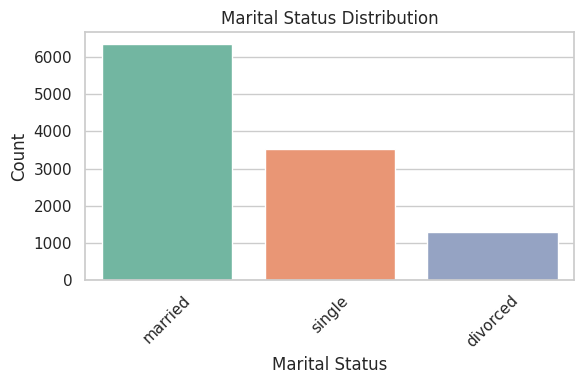

In [38]:
# Setting the style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(6, 4))

# Setting the figure size (width, height)
sns.countplot(x='marital', data = df, palette='Set2')

# Count plot
# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation = 45)

# Show the plot
plt.tight_layout()  #Ensures labels don't get cut off
plt.show()


Based on Education

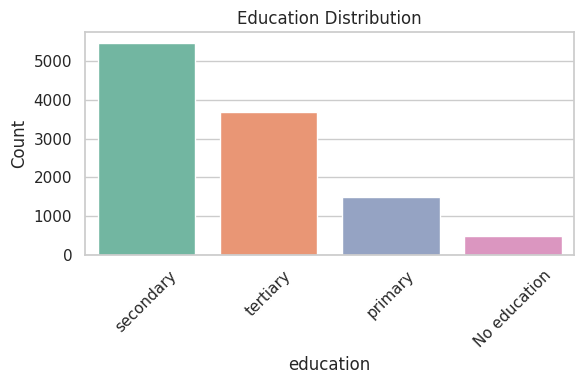

In [39]:
# Setting the style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(6, 4))

# Setting the figure size (width, height)
sns.countplot(x='education', data = df, palette='Set2')

# Count plot
# Add labels and title
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Education Distribution')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation = 45)

# Show the plot
plt.tight_layout()  #Ensures labels don't get cut off
plt.show()

Based on Job Title

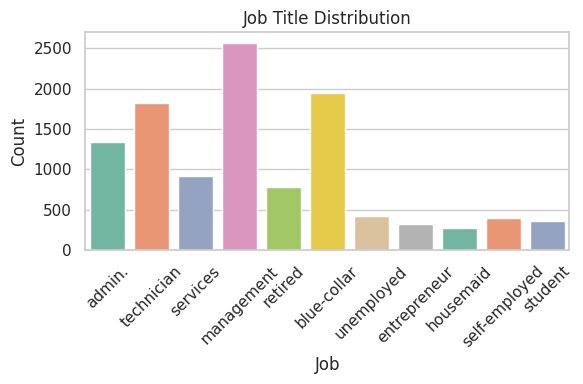

In [45]:
# Setting the style
sns.set(style = "whitegrid")

# Create a bar chart
plt.figure(figsize = (6, 4))

# Setting the figure size (width, height)
sns.countplot(x ='job', data = df, palette ='Set2')

# Add labels and title
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Title Distribution')

# Rotate x-axis labels
plt.xticks(rotation = 45)

# Show the plot
plt.tight_layout()
plt.show()

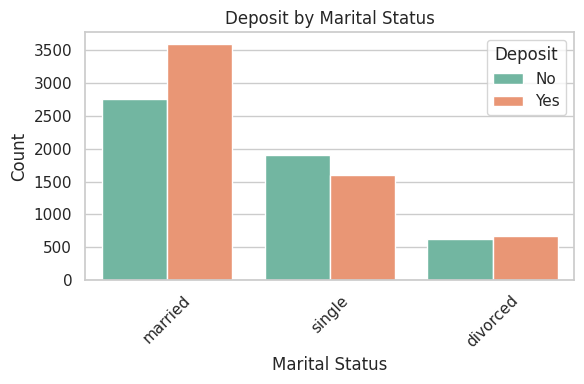

In [44]:
# Set the style
sns.set(style = "whitegrid")

# Create a bar plot
plt.figure(figsize =(6, 4))  # Set the figure size (width, height)
sns.countplot(x ='marital', hue ='deposit', data = df, palette ='Set2')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Deposit by Marital Status')

# Rotate x-axis labels
plt.xticks(rotation = 45)

# Add legend
plt.legend(title ='Deposit', labels=['No', 'Yes'])

# Show the plot
plt.tight_layout()
plt.show()


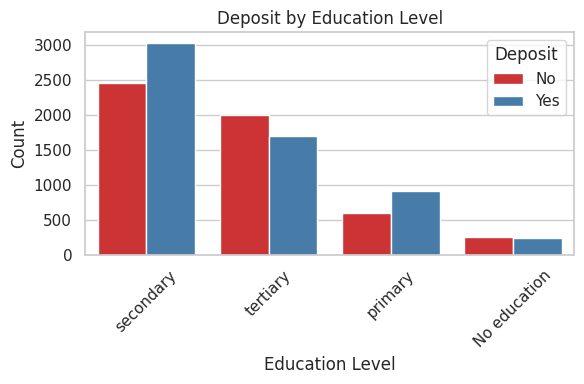

In [47]:
# Set the style
sns.set(style = "whitegrid")

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x = 'education', hue = 'deposit', data = df, palette = 'Set1')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Deposit by Education Level')

# Rotate x-axis labels
plt.xticks(rotation = 45)

# Add legend
plt.legend(title = 'Deposit', labels = ['No', 'Yes'])

# Show the plot
plt.tight_layout()
plt.show()

Loans based on Marital Status

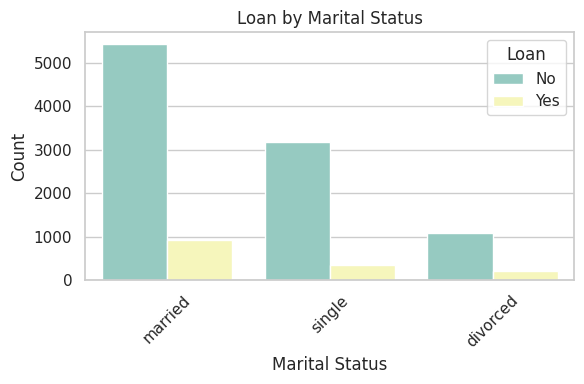

In [50]:
# Set the style (optional)
sns.set(style = "whitegrid")

# Create a bar plot
plt.figure(figsize = (6, 4))
sns.countplot(x ='marital', hue ='loan', data = df, palette = 'Set3')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Loan by Marital Status')

# Rotate x-axis labels
plt.xticks(rotation = 45)

# Add legend
plt.legend(title = 'Loan', labels = ['No', 'Yes'])

# Show the plot
plt.tight_layout()
plt.show()